# Faceting in two Directions

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# load dataset
fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')

In [3]:
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [4]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [5]:
fuel_econ['comb'].describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

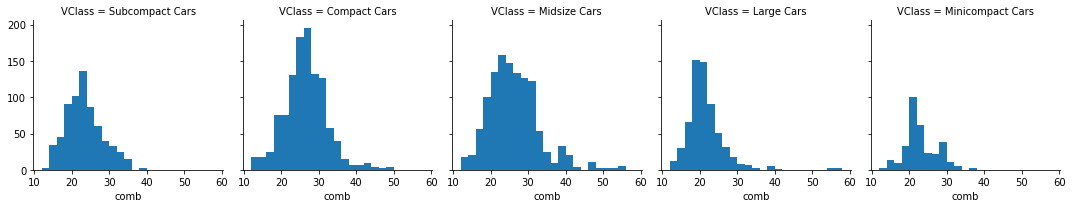

In [6]:
bins=np.arange(12, 58+2,2)
g=sb.FacetGrid(data=fuel_econ, col='VClass');
g.map(plt.hist,'comb', bins=bins);

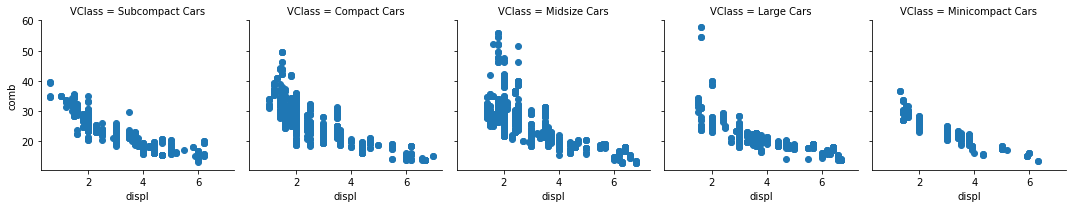

In [7]:
g=sb.FacetGrid(data=fuel_econ, col='VClass');
g.map(plt.scatter,'displ','comb');

In [8]:
fuel_econ['trans_type']= fuel_econ['trans'].apply(lambda x:x.split()[0])

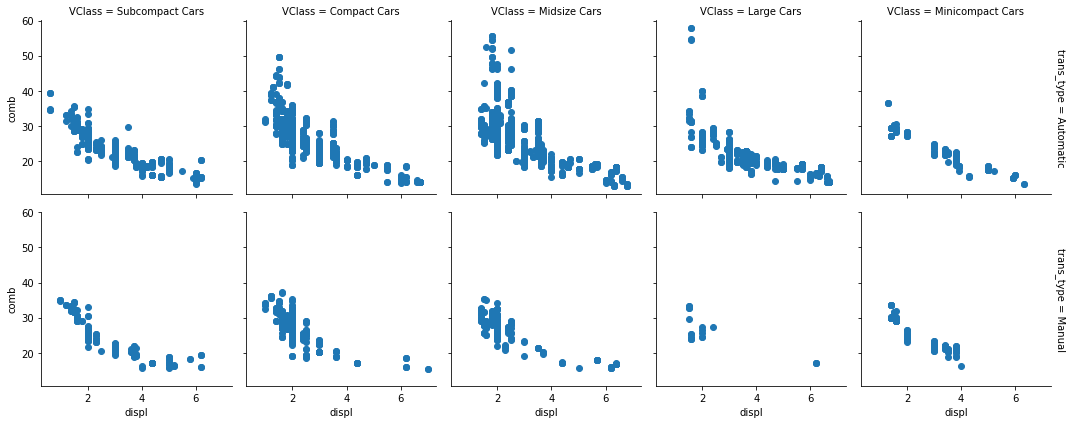

In [9]:
# margin_titles moves row labels to the right of the facet grid leaving the column labels on top. 
g=sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type', margin_titles=True);
g.map(plt.scatter,'displ','comb');

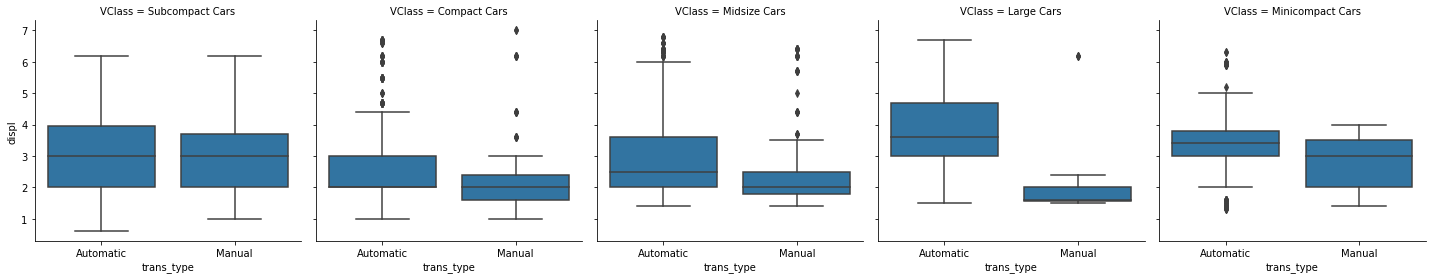

In [10]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', height = 4);
g.map(sb.boxplot, 'trans_type', 'displ', order=['Automatic', 'Manual']);

Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.

c:\Users\Dave\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


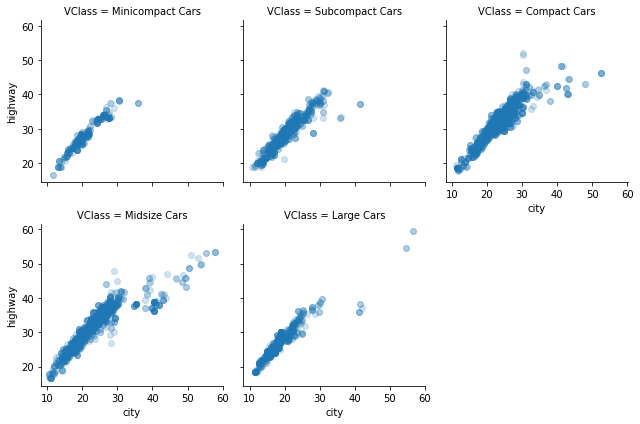

In [11]:
def adaptedplot_solution_1():
  # data setup
  fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')
  sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  pd_ver = pd.__version__.split(".")
  if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
  else: # compatibility for v.20
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, categories = sedan_classes)
  # plotting
  g = sb.FacetGrid(data = fuel_econ, col = 'VClass', size = 3, col_wrap = 3)
  g.map(plt.scatter, 'city', 'highway', alpha = 1/5)


adaptedplot_solution_1()

I went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.

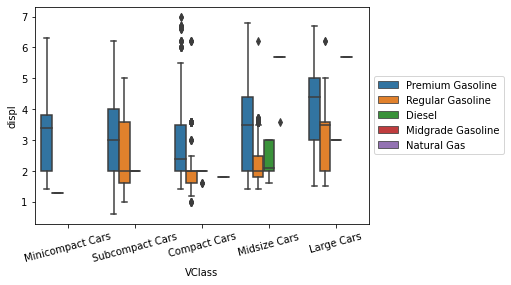

In [12]:
def adaptedplot_solution_2():
  # data setup
  fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')
  sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  pd_ver = pd.__version__.split(".")
  if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
  else: # compatibility for v.20
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, categories = sedan_classes)
    fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
  # plotting
  sb.boxplot(data = fuel_econ, x = 'VClass', y = 'displ', hue = 'fuelType')
  plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
  plt.xticks(rotation = 15)



adaptedplot_solution_2()